# Code for Additive Noise Protection Method

***

Borrowing the notation from [Schneider & Lee (2022)](https://arxiv.org/abs/2106.16085):

There are $J$ times series denoted $y_j$.

The confidential (actual) value of $y_j$ at time $t$ is denoted $A_{j,t}$.

Under `Additive Noise Protection`, each $A_{j,t}$ is replaced with a protected value $P_{j,t}$, where

$$
P_{j,t} = A_{j,t} + r,
$$

$$
r \sim N(0, \sigma^2),
$$

$$ \sigma^2 = E[(x_j - E[x_j])^2]. $$

***

## Step 1: Import Time Series Data

In [1]:
# general modules
import numpy as np

# nice time series plots
from sktime.utils.plotting import plot_series

In [2]:
# import weekly finance series, skipping column names
Y = np.genfromtxt("../../../Data/Train/Clean/weekly_finance_clean.csv", delimiter = ',', skip_header = 1)

In [3]:
# store number of time series and number of time periods
num_series, num_periods = Y.shape

In [4]:
Y

array([[10825.88, 10830.99, 10831.68, ..., 10678.92, 10678.  , 10676.48],
       [ 1725.7 ,  1725.7 ,  1749.7 , ...,  3566.9 ,  3566.9 ,  3489.8 ],
       [  733.6 ,   856.2 ,   778.3 , ...,  1113.3 ,  1016.8 ,  1084.1 ],
       ...,
       [ 1917.9 ,  1918.3 ,  1947.7 , ...,  2378.3 ,  2381.2 ,  2509.4 ],
       [ 1368.  ,  1305.5 ,  1308.6 , ...,  2102.2 ,  2177.5 ,  2160.3 ],
       [ 3241.  ,  3238.  ,  3275.  , ...,  6140.  ,  6014.  ,  5811.  ]])

## Step 2: Calculate Standard Deviations

In [5]:
# calculate standard deviation of each series
sigma2 = np.std(Y, axis=1)

## Step 3: Add Random Normal Draws to Original Series

In [6]:
# random normal draws to create r, 
# add to each y_j 
P = [(np.random.normal(loc=0, scale=sigma2[i], size=num_periods) + Y[i,:]).reshape(1,num_periods) for i in range(num_series)]

In [7]:
# concatenate into array (matrix)
P = np.concatenate(P)

## Extra: Examine Results

In [8]:
import pandas as pd

In [9]:
P, Y = pd.DataFrame(P), pd.DataFrame(Y)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='0'>)

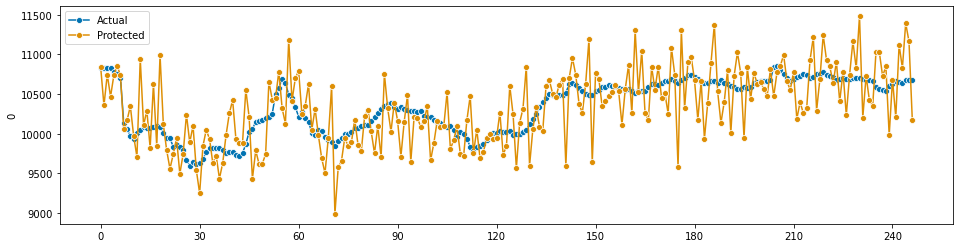

In [10]:
plot_series(Y.iloc[0,:], P.iloc[0,:], labels=["Actual", "Protected"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='1'>)

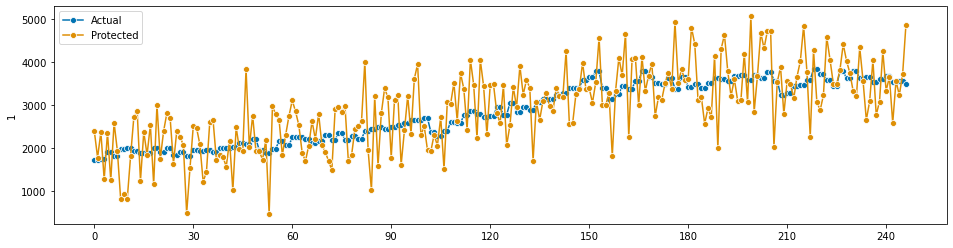

In [11]:
plot_series(Y.iloc[1,:], P.iloc[1,:], labels=["Actual", "Protected"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='5'>)

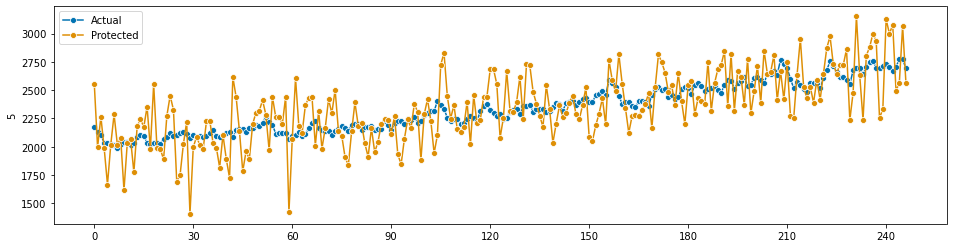

In [12]:
plot_series(Y.iloc[5,:], P.iloc[5,:], labels=["Actual", "Protected"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='18'>)

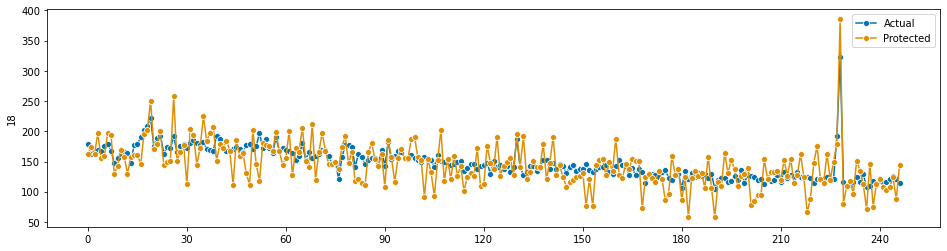

In [13]:
plot_series(Y.iloc[18,:], P.iloc[18,:], labels=["Actual", "Protected"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='19'>)

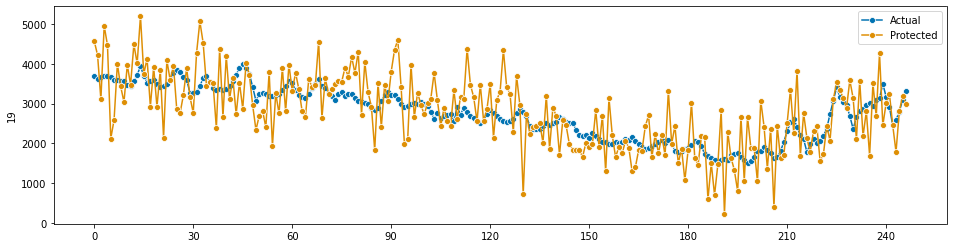

In [14]:
plot_series(Y.iloc[19,:], P.iloc[19,:], labels=["Actual", "Protected"])